In [1]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from math import sqrt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from scipy import sparse
from scipy.stats import uniform, randint
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder  
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB

import  lightgbm as lgbm 
import xgboost as xgb 
import catboost as cat 

In [3]:
#load data
df = pd.read_csv("PleaseFundThis.csv")

In [4]:
#check data
df.head()

,project_id,project_name,date_launched,duration_days,goal_$,percent_raised,amt_pledged_$,major_category,minor_category,project_update_count,...,highest_pledge_reward_$,total_count_of_pledge_levels,project_success,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,805069526,Big Bully BBQ,19/04/2012,60,12000.0,29.67,3560.0,Food,Food,0,...,"2,500",9,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1046206236,Gary Graves New Recording,19/04/2012,60,2500.0,31.80,795.0,Music,Country & Folk,0,...,500,7,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7014665777,Newgrounds: The Forsaken City,20/04/2012,60,30000.0,61.26,18378.0,Film & Video,Webseries,8,...,"5,000",17,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,208975283,Children of the Elements - the Sustainability ...,20/04/2012,60,12500.0,48.18,6022.0,Publishing,Children's Book,12,...,"2,000",13,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,307345220,Synchronized Chaos International Magazine's Ou...,20/04/2012,60,300.0,133.33,400.0,Publishing,Periodical,0,...,100,4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#summary
df.describe()

,project_id,duration_days,goal_$,percent_raised,amt_pledged_$,project_update_count,number_of_pledgers,comments_count,facebook_friends_count,total_count_of_pledge_levels,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,2.844700e+04,28447.000000,2.844700e+04,28447.000000,2.844700e+04,28447.000000,28447.00000,28447.000000,17886.000000,28447.000000,0.0,7.000000,6.000000,4.000000,3.000000,3.000000,3.000000
mean,4.126527e+09,32.749886,2.057456e+04,120.701537,1.019584e+04,3.218582,133.17559,30.299012,479.219445,9.203607,NaN,2024.000000,2445.833333,1306.250000,76.666667,78.333333,80.000000
std,2.935143e+09,10.979895,2.410157e+05,1757.962943,9.136661e+04,5.228219,1124.92532,740.131945,777.858283,5.229805,NaN,3341.584255,4008.199617,2462.604905,28.431204,25.658007,26.457513
min,6.022280e+05,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,1.000000,NaN,40.000000,45.000000,45.000000,45.000000,50.000000,50.000000
25%,1.065575e+09,30.000000,2.000000e+03,5.380000,2.900000e+02,0.000000,6.00000,0.000000,0.000000,6.000000,NaN,90.000000,85.000000,71.250000,65.000000,67.500000,70.000000
50%,4.043883e+09,30.000000,5.000000e+03,72.590000,1.710000e+03,1.000000,28.00000,0.000000,221.000000,8.000000,NaN,310.000000,275.000000,90.000000,85.000000,85.000000,90.000000
75%,7.022325e+09,35.000000,1.200000e+04,113.330000,5.675000e+03,4.000000,80.00000,3.000000,596.000000,11.000000,NaN,2375.000000,3112.500000,1325.000000,92.500000,92.500000,95.000000
max,9.099942e+09,60.000000,2.147484e+07,240716.000000,8.596475e+06,147.000000,91584.00000,59463.000000,5358.000000,31.000000,NaN,8888.000000,10000.000000,5000.000000,100.000000,100.000000,100.000000


In [6]:
#get columns
df.columns.tolist()  

['project_id',
 'project_name',
 ' date_launched ',
 'duration_days',
 'goal_$',
 'percent_raised',
 'amt_pledged_$',
 'major_category',
 'minor_category',
 'project_update_count',
 'city',
 'region',
 'number_of_pledgers',
 'comments_count',
 ' avg_amt$_per_pledger ',
 'project_has_video',
 'project_has_facebook_page',
 'facebook_friends_count',
 'project_has_pledge_rewards',
 ' lowest_pledge_reward_$ ',
 ' highest_pledge_reward_$ ',
 ' total_count_of_pledge_levels ',
 'project_success',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29']

In [7]:
#drop unnamed columns
df = df.drop(['Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29'], axis=1)

In [8]:
#drop descriptive metrics
df = df.drop([' lowest_pledge_reward_$ ',' highest_pledge_reward_$ ',' total_count_of_pledge_levels ', 
              ' avg_amt$_per_pledger '],axis=1)

In [9]:
df.shape

(28447, 19)

In [10]:
#check for missing data
df.isnull().sum()

project_id                        0
project_name                      0
 date_launched                    0
duration_days                     0
goal_$                            0
percent_raised                    0
amt_pledged_$                     0
major_category                    0
minor_category                    0
project_update_count              0
city                              0
region                            0
number_of_pledgers                0
comments_count                    0
project_has_video                 0
project_has_facebook_page         0
facebook_friends_count        10561
project_has_pledge_rewards        0
project_success                   0
dtype: int64

In [11]:
#drop facebook friends count
df = df.drop('facebook_friends_count',axis=1)

In [14]:
#drop city, drop minor category, project id and name, percent raised,
df = df.drop(['minor_category','project_id','project_name','percent_raised'],axis=1)

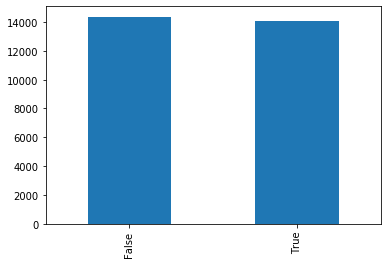

In [15]:
#check for target ratio
pd.value_counts(df['project_success']).plot.bar()

no need to rebalance classes

In [18]:
df["project_success"].unique()

array([False,  True])

In [19]:
#recode target variable
df["project_success"].replace({False: 0, True: 1}, inplace=True)

In [23]:
df[' date_launched '] = pd.to_datetime(df[' date_launched '])

In [27]:
#get year, month, day of week variable
df['week_name'] = df[' date_launched '].dt.weekday_name
df['year'] = df[' date_launched '].dt.year
df['month'] = df[' date_launched '].dt.month

In [28]:
#drop date launched column
df = df.drop(' date_launched ',axis=1)

In [30]:
#recode 'project_has_video','project_has_facebook_page','project_has_pledge_rewards'

df['project_has_video'].replace({False: 0, True: 1}, inplace=True)
df['project_has_facebook_page'].replace({"No": 0, "Yes": 1}, inplace=True)
df['project_has_pledge_rewards'].replace({"No": 0, "Yes": 1}, inplace=True)

In [32]:
#drop city
df = df.drop('city',axis=1)

## Modeling

In [33]:
df.head()

,duration_days,goal_$,amt_pledged_$,major_category,project_update_count,region,number_of_pledgers,comments_count,project_has_video,project_has_facebook_page,project_has_pledge_rewards,project_success,week_name,year,month
0,60,12000.0,3560.0,Food,0,United States,34,2,1,0,1,0,Thursday,2012,4
1,60,2500.0,795.0,Music,0,United States,17,0,1,0,1,0,Thursday,2012,4
2,60,30000.0,18378.0,Film & Video,8,United States,355,56,0,0,1,0,Friday,2012,4
3,60,12500.0,6022.0,Publishing,12,Hungary,147,15,1,0,1,0,Friday,2012,4
4,60,300.0,400.0,Publishing,0,United States,11,0,0,0,1,1,Friday,2012,4


In [35]:
df.shape

(28447, 15)

In [39]:
#split categorical variables
df_cat = df[['major_category','region','week_name']]
df_cat = pd.get_dummies(df_cat, columns=['major_category','region','week_name'], drop_first=False)
df_cat.reset_index(drop=True, inplace=True)

In [37]:
#cts
scaler = preprocessing.MinMaxScaler()
df_cts = df[['duration_days',
 'goal_$',
 'amt_pledged_$',
 'project_update_count',
 'number_of_pledgers',
 'comments_count',
 'project_has_video',
 'project_has_facebook_page',
 'project_has_pledge_rewards',
 'year',
 'month']] 
df_cts = scaler.fit_transform(df_cts)
df_cts = pd.DataFrame(df_cts, columns=['duration_days',
 'goal_$',
 'amt_pledged_$',
 'project_update_count',
 'number_of_pledgers',
 'comments_count',
 'project_has_video',
 'project_has_facebook_page',
 'project_has_pledge_rewards',
 'year',
 'month'])
df_cts.reset_index(drop=True, inplace=True)

In [38]:
df['project_success'].reset_index(drop=True, inplace=True)

In [40]:
#combine
df = pd.concat([df_cts, df_cat,df['project_success']], axis=1)

In [41]:
train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)

In [45]:
df.shape

(28447, 167)

In [47]:
features=train.iloc[:,0:166]
target = train['project_success']
Name=[]
Accuracy=[]
model1=LogisticRegression(random_state=22,C=0.000000001,solver='liblinear',max_iter=200)
model2=GaussianNB()
model3=RandomForestClassifier(n_estimators=200,random_state=22)
model4=GradientBoostingClassifier(n_estimators=200)
model5=KNeighborsClassifier()
model6=DecisionTreeClassifier()
model7=LinearDiscriminantAnalysis()
model8=BaggingClassifier()
Ensembled_model=VotingClassifier(estimators=[('lr', model1), ('gn', model2), ('rf', model3),('gb',model4),('kn',model5),('dt',model6),('lda',model7), ('bc',model8)], voting='hard')
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.575094 of model Logistic Regression
Accuracy: 0.530670 of model Naive Bayes
Accuracy: 0.961640 of model Random Forest
Accuracy: 0.993804 of model Gradient Boosting
Accuracy: 0.610511 of model KNN
Accuracy: 0.993365 of model Decision Tree
Accuracy: 0.703884 of model LDA
Accuracy: 0.995606 of model Bagging Classifier
Accuracy: 0.892741 of model Ensemble


In [54]:
#apply on test

from sklearn.metrics import accuracy_score
classifers=[model3,model4,model6,model8]
out_sample_accuracy=[]
Name_2=[]
for each in classifers:
    fit=each.fit(features,target)
    pred=fit.predict(test.iloc[:,0:166])
    accuracy=accuracy_score(test['project_success'],pred)
    Name_2.append(each.__class__.__name__)
    out_sample_accuracy.append(accuracy)

array([0, 1, 0, ..., 1, 1, 1])

In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_actu = test['project_success']
confusion_matrix(y_actu, pred)

array([[2839,   11],
       [   1, 2838]])

In [56]:
#Precision-Recall Curve
sklearn.metrics.precision_recall_curve(y_actu, pred, pos_label=None, sample_weight=None)

(array([0.49903322, 0.996139  , 1.        ]),
 array([1.        , 0.99964776, 0.        ]),
 array([0, 1]))

In [57]:
#Precision-Recall Score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_actu, pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 1.00


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

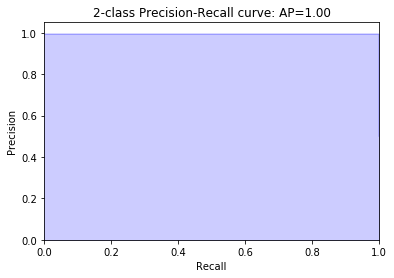

In [58]:

#Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_actu, pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))